# 실습코드(미세먼지 데이터)

- 에어코리아에 접속해서 2019년 4월의 전국 단위 미세먼지 측정치를 다운로드합니다.
- 다운로드 파일은 미리 올려드렸으니 'Y2019Q4' 파일을 로드하여 실습해봅시다!

In [27]:
import numpy as np
import pandas as pd

df= pd.read_csv("Y2019Q4.csv", header=0, engine='python') 

In [58]:
df.head()

,SGG,망,id,id_name,date,SO2,CO,O3,NO2,PM10,PM25,add
0,서울 중구,도시대기,111121,중구,2019040101,0.002,0.4,0.037,0.022,27.0,16.0,서울특별시 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019040102,0.003,0.4,0.037,0.021,25.0,15.0,서울특별시 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019040103,0.003,0.4,0.041,0.016,23.0,13.0,서울특별시 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019040104,0.002,0.5,0.030,0.025,22.0,12.0,서울특별시 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019040105,0.002,0.4,0.032,0.023,23.0,12.0,서울특별시 중구 덕수궁길 15


In [59]:
#df의 전체적인 정보를 조회해봅시다
df.shape

(314339, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314339 entries, 0 to 314338
Data columns (total 12 columns):
SGG        314339 non-null object
망          314339 non-null object
id         314339 non-null int64
id_name    314339 non-null object
date       314339 non-null int64
SO2        301514 non-null float64
CO         300889 non-null float64
O3         302759 non-null float64
NO2        304334 non-null float64
PM10       302581 non-null float64
PM25       283965 non-null float64
add        314339 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 31.2+ MB


In [61]:
#실전에서 칼럼네임이 한글이면 깨지는 경우가 많습니다. 영어로 변경해봅시다
df=df.rename(index=str, columns={'지역':"SGG","측정소코드":"id","측정소명":"id_name","측정일시":"date","주소":"add"})
df.head()

,SGG,망,id,id_name,date,SO2,CO,O3,NO2,PM10,PM25,add
0,서울 중구,도시대기,111121,중구,2019040101,0.002,0.4,0.037,0.022,27.0,16.0,서울특별시 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019040102,0.003,0.4,0.037,0.021,25.0,15.0,서울특별시 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019040103,0.003,0.4,0.041,0.016,23.0,13.0,서울특별시 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019040104,0.002,0.5,0.030,0.025,22.0,12.0,서울특별시 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019040105,0.002,0.4,0.032,0.023,23.0,12.0,서울특별시 중구 덕수궁길 15


In [62]:
#필요한 컬럼들만 뽑아냅시다(참고: PM10은 미세먼지, PM25는 초미세먼지를 의미)
cols=['SGG','id','date','SO2','CO','PM10','PM25']
df2=df[cols]
df2.tail()

,SGG,id,date,SO2,CO,PM10,PM25
314334,인천 옹진군,831492,2019043020,0.0017,0.2,16.0,12.0
314335,인천 옹진군,831492,2019043021,0.0013,0.2,19.0,10.0
314336,인천 옹진군,831492,2019043022,0.0012,0.2,21.0,9.0
314337,인천 옹진군,831492,2019043023,0.0010,0.2,21.0,15.0
314338,인천 옹진군,831492,2019043024,0.0010,0.2,22.0,11.0


In [63]:
#'date' 칼럼의 타입을 datetime으로 설정하고, 이를 인덱스로 설정해봅시다.
##'date'를 연-월-일 형식으로 바꿔봅시다. 마지막 2자리는 제외(마지막 2자리는 hour)

s_date=df2.date.astype(str)
#str=문자 형으로 바꿈

s_date2=s_date.str[:-2]
#마지막 두자리는 시간이어서 제거

df2['DATE']=pd.to_datetime(s_date2)
#str형이었던것 datetime으로 바꾸기

df2.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,SGG,id,date,SO2,CO,PM10,PM25,DATE
0,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0,2019-04-01
1,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0,2019-04-01
2,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0,2019-04-01
3,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0,2019-04-01
4,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0,2019-04-01


In [64]:
print(df2.DATE.dtypes)

datetime64[ns]


In [65]:
df2.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '314329', '314330', '314331', '314332', '314333', '314334', '314335',
       '314336', '314337', '314338'],
      dtype='object', length=314339)

In [66]:
df2=df2.set_index('DATE')
#d인덱스 바꾸기 set_index(~~)
df2.head()

,SGG,id,date,SO2,CO,PM10,PM25
DATE,,,,,,,
2019-04-01,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0
2019-04-01,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0
2019-04-01,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0
2019-04-01,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0
2019-04-01,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0


In [67]:
df2.index

DatetimeIndex(['2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01',
               '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01',
               '2019-04-01', '2019-04-01',
               ...
               '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30',
               '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30',
               '2019-04-30', '2019-04-30'],
              dtype='datetime64[ns]', name='DATE', length=314339, freq=None)

In [68]:
#'date'컬럼 드롭
df2=df2.drop('date',axis=1)#칼럼 드롭이니 axis = 1
df2.head()

,SGG,id,SO2,CO,PM10,PM25
DATE,,,,,,
2019-04-01,서울 중구,111121,0.002,0.4,27.0,16.0
2019-04-01,서울 중구,111121,0.003,0.4,25.0,15.0
2019-04-01,서울 중구,111121,0.003,0.4,23.0,13.0
2019-04-01,서울 중구,111121,0.002,0.5,22.0,12.0
2019-04-01,서울 중구,111121,0.002,0.4,23.0,12.0


In [69]:
#새로운 칼럼인 'SIDO'를 만들어봅시다
df2['SIDO']=df2['SGG'].str[0:2] #[n:m]시 m은 포함 x 

#참고: 띄어쓰기 전까지 자르겠다!) df2['SIDO'] = df2['SGG'].str.split(' ')[0]

df2.head()

,SGG,id,SO2,CO,PM10,PM25,SIDO
DATE,,,,,,,
2019-04-01,서울 중구,111121,0.002,0.4,27.0,16.0,서울
2019-04-01,서울 중구,111121,0.003,0.4,25.0,15.0,서울
2019-04-01,서울 중구,111121,0.003,0.4,23.0,13.0,서울
2019-04-01,서울 중구,111121,0.002,0.5,22.0,12.0,서울
2019-04-01,서울 중구,111121,0.002,0.4,23.0,12.0,서울


In [70]:
#시도별 하루 초미세먼지의 평균을 구해봅시다
daily_mean=df2.groupby(['SIDO','DATE'])['PM25'].mean()
daily_mean.head(10)

SIDO  DATE      
강원    2019-04-01    17.067941
      2019-04-02    15.893082
      2019-04-03    19.614256
      2019-04-04    23.418860
      2019-04-05    24.406181
      2019-04-06    14.756250
      2019-04-07    13.703158
      2019-04-08    12.529412
      2019-04-09     9.227700
      2019-04-10     3.550898
Name: PM25, dtype: float64

In [71]:
#보기 쉽게, stack 메서드를 이용하여 표로 정리해봅시다(date/SIDO)
daily_mean2=daily_mean.unstack(level=0) 
#unstack : 눕히기 
#level = 칼럼 번호 0은 첫번째 칼럼 > 따라서 시도 기준 누운 표

daily_mean2.head()

SIDO,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
DATE,,,,,,,,,,,,,,,,,
2019-04-01,17.067941,11.882521,11.736349,12.011905,10.507463,13.453333,11.235915,16.206406,12.218317,11.159574,12.423174,10.416136,9.448519,12.346975,11.962406,12.056061,14.772009
2019-04-02,15.893082,17.141889,13.584252,14.985981,17.039604,16.714660,14.191638,17.924429,16.965480,15.656250,16.115183,15.506383,14.303073,17.878472,21.302817,17.057269,21.241935
2019-04-03,19.614256,21.720133,14.018809,16.498818,17.114833,18.785340,18.409722,19.128521,22.645678,19.787234,18.025381,20.257732,14.295518,21.930070,11.616000,21.135521,23.615556
2019-04-04,23.418860,20.756563,18.759812,19.306977,26.160000,20.524804,21.125000,23.071304,20.144989,23.625000,21.713217,17.896000,18.571622,24.729965,12.298611,20.541007,27.035398
2019-04-05,24.406181,23.270219,26.727129,27.344340,31.466981,27.894309,27.947552,33.141361,24.087645,24.631579,32.083538,19.928571,30.678378,33.229021,40.812500,25.824561,28.355705


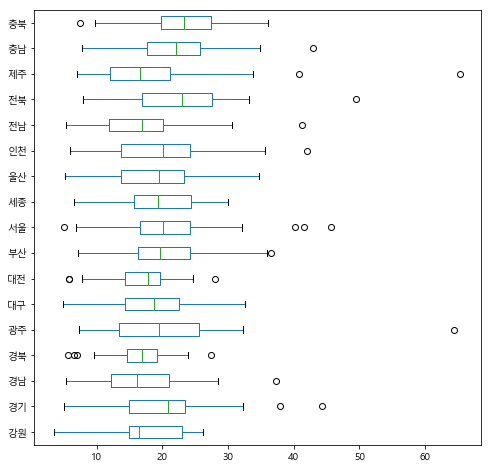

In [72]:
#시각화(참고)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font' , family=font_name); 

daily_mean2.plot(kind='box', vert=0, figsize=(8,8)) 
plt.show()

# Quest

1. 로드한 'df2'데이터프레임에는 결측치가 상당수 포함되어 있습니다. 
결측치를 확인하는 코드를 이용하여, 어떤 칼럼에 결측치가 얼마나 있는지 파악해보세요.
그리고, 'SO2','CO' 컬럼의 결측치는 그것의 평균값으로 채우고,
'PM10','PM25' 컬럼의 결측치는 모두 삭제하는 코드를 작성해주세요.

In [73]:
df2.isna().sum()
df2['SO2']=df2['SO2'].fillna(df['SO2'].mean())
df2['CO']=df2['CO'].fillna(df['CO'].mean())
df2=df.dropna(how='any')
df2.isna().sum()
#확인에는 isna().sum()
#채우기에는 fillna() 
#뺄때는 dropna(how='any')

SGG        0
망          0
id         0
id_name    0
date       0
SO2        0
CO         0
O3         0
NO2        0
PM10       0
PM25       0
add        0
dtype: int64

2. df2의 'date' 칼럼은 '2018030509'와 같이 '연+월+일+시'로 되어 있습니다.
우리는 여기서 연+월+일만 슬라이싱해 datetime형태로 DATE를 다시 정의했었죠?(ex. 2018-03-05)
마찬가지로, 이번엔 '시'만 슬라이싱해 df2의 새로운 칼럼인 'hour' 칼럼을 만들어주세요.(ex. 09)

In [74]:
n_date=df.date.astype(str)
#str=문자 형으로 바꿈

n_date=n_date.str[8:]
#마지막 두자리는 시간

df2['hour']=n_date
df2


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,SGG,망,id,id_name,date,SO2,CO,O3,NO2,PM10,PM25,add,hour
0,서울 중구,도시대기,111121,중구,2019040101,0.0020,0.4,0.037,0.0220,27.0,16.0,서울특별시 중구 덕수궁길 15,01
1,서울 중구,도시대기,111121,중구,2019040102,0.0030,0.4,0.037,0.0210,25.0,15.0,서울특별시 중구 덕수궁길 15,02
2,서울 중구,도시대기,111121,중구,2019040103,0.0030,0.4,0.041,0.0160,23.0,13.0,서울특별시 중구 덕수궁길 15,03
3,서울 중구,도시대기,111121,중구,2019040104,0.0020,0.5,0.030,0.0250,22.0,12.0,서울특별시 중구 덕수궁길 15,04
4,서울 중구,도시대기,111121,중구,2019040105,0.0020,0.4,0.032,0.0230,23.0,12.0,서울특별시 중구 덕수궁길 15,05
5,서울 중구,도시대기,111121,중구,2019040106,0.0020,0.4,0.022,0.0330,21.0,11.0,서울특별시 중구 덕수궁길 15,06
6,서울 중구,도시대기,111121,중구,2019040107,0.0020,0.4,0.018,0.0350,21.0,9.0,서울특별시 중구 덕수궁길 15,07
7,서울 중구,도시대기,111121,중구,2019040108,0.0020,0.4,0.026,0.0270,20.0,10.0,서울특별시 중구 덕수궁길 15,08
8,서울 중구,도시대기,111121,중구,2019040109,0.0030,0.4,0.031,0.0220,21.0,14.0,서울특별시 중구 덕수궁길 15,09
9,서울 중구,도시대기,111121,중구,2019040110,0.0030,0.3,0.038,0.0180,23.0,11.0,서울특별시 중구 덕수궁길 15,10


3. 미세먼지가 나쁜 기준은 초미세먼지('PM25')가 35보다 크면 '나쁨'으로 분류한다고 합니다.
불린 인덱싱과, 위의 2번에서 만든 'hour' 칼럼을 이용하여, 
시군구(SGG)별로 PM25가 35보다 큰 시간들을 카운트하고,
초미세먼지가 35보다 큰 개수가 많은 시군구와 그 시간대가 언제인지 sorting하여 구해주세요.

In [75]:
df3 = df2[df2.PM25 > 35][['SGG','hour']]
df3 = df3.sort_values(by=['SGG'], ascending=False)
df3.head() #35보다 큰 시간들



,SGG,hour
263075,충북 충주시,01
263720,충북 충주시,22
263718,충북 충주시,20
263717,충북 충주시,19
263716,충북 충주시,18


In [76]:
df3['SGG'].value_counts()  #35보다 큰 갯수

경기 부천시        1035
충남 아산시         814
경기 시흥시         618
경기 평택시         614
경기 화성시         602
경기 고양시         541
전북 익산시         512
충북 청주시         495
충남 천안시         488
경기 수원시         447
전북 전주시         434
울산 남구          401
충남 당진시\r\n     389
경남 창원시         386
경기 김포시         366
전북 군산시         359
충북             348
경기 안산시         314
경기 성남시         314
경기 남양주시        307
경기 안양시         272
서울 서초구         265
서울 성동구         249
인천 남구          249
전남 여수시         243
부산 강서구         230
세종 세종시         219
서울 마포구         215
전남             214
부산 사상구         213
              ... 
경남 거창군          33
서울 강북구          31
경남 고성군          31
경기 양평군          30
경남 하동군          30
충남 계룡시          30
서울 금천구          30
경북 경산시          28
경북 영천시          27
경남 함안군          26
대전 동구           26
경남 밀양시          24
경남 사천시          23
강원 속초시          23
경북 영주시          22
경기 가평군          21
경북 경주시          19
전북 무주군          18
강원 양구군          18
경기 하남시          15
강원 동해시          15
강원 삼척시      